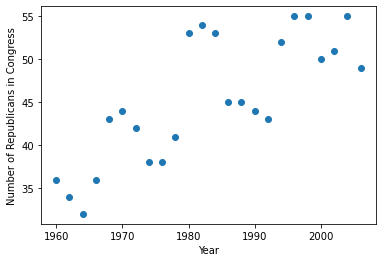

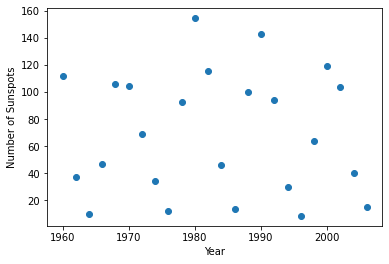

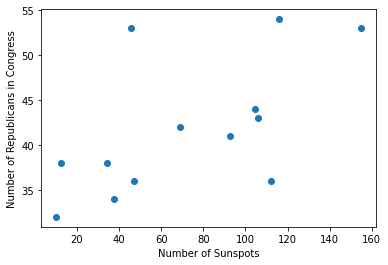

In [1]:
#####################
# CS 181, Spring 2021
# Homework 1, Problem 4
# Start Code
##################

import csv
import numpy as np
import matplotlib.pyplot as plt

csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

[   35.52966401   -45.11187053   478.24887916 -1158.24184579
  1135.41523923  -393.02346127]
L2 for part A: 394.9803839890886


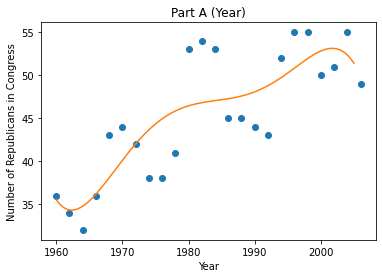

[32.35407064  6.14791069 -7.63571464 18.55252543 -9.20204719 17.10931603
 12.4068037  -2.65575295 20.04204243  4.7885002  19.43706728 -5.1620967 ]
L2 for part B: 54.27309661671953


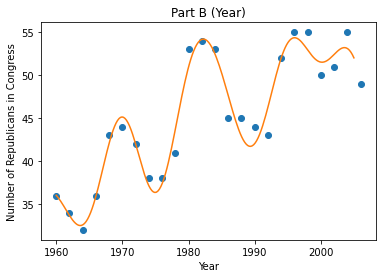

[45.56179772 -0.07400543 -0.71979459  0.86222877 -2.22510834  2.33876019]
L2 for part C: 1082.8088559867185


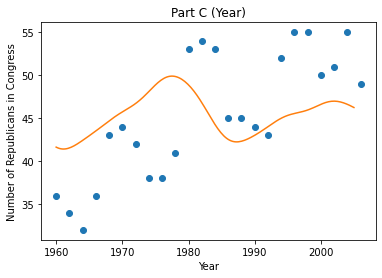

[-1.16029221e+05 -6.31528354e-01 -1.72648298e+00 -2.67575085e+01
  5.88450140e+02  2.85386003e+04  2.38564666e+05  4.77591011e+05
  1.47979769e+05  3.43265758e+04  7.66400737e+04  1.04274257e+06
 -5.16813553e+04  6.38957712e+05 -2.80083833e+04  6.32374773e+04
 -8.42289866e+05 -2.33358867e+05 -1.18467162e+05 -2.38401746e+05
 -6.57838594e+04  1.23839441e+05 -3.17728693e+05  3.81647125e+05
 -3.32128626e+05  3.25021542e+05]
L2 for part D: 39.001114836754304


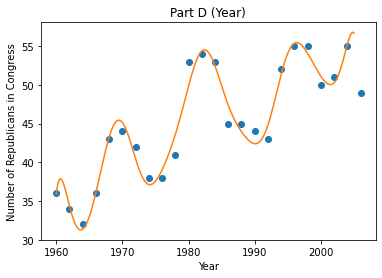

L2 for part A: 351.2279357741768


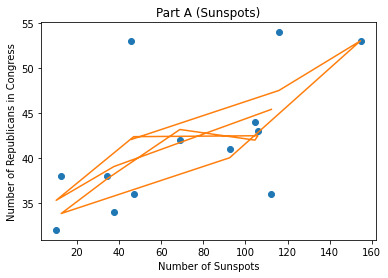

L2 for part C: 375.106757781674


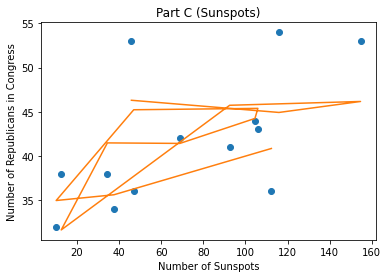

L2 for part D: 7.441068192056809e-22


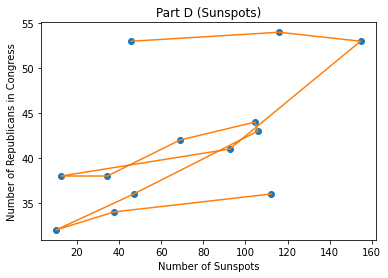

In [26]:
# TODO: basis functions
# Based on the letter input for part ('a','b','c','d'), output numpy arrays for the bases.
# The shape of arrays you return should be: (a) 24x6, (b) 24x12, (c) 24x6, (c) 24x26
# xx is the input of years (or any variable you want to turn into the appropriate basis).
# is_years is a Boolean variable which indicates whether or not the input variable is
# years; if so, is_years should be True, and if the input varible is sunspots, is_years
# should be false
def make_basis(xx,part='a',is_years=True):
#DO NOT CHANGE LINES 65-69
    if part == 'a' and is_years:
        xx = (xx - np.array([1960]*len(xx)))/40
        
    if part == "a" and not is_years:
        xx = xx/20
        
    if part == 'a':
        arr = []
        for x in xx:
            arr.append([1, x, x**2, x**3, x**4, x**5])
        return np.array(arr)
    
    elif part == 'b':
        arr = []
        for x in xx:
            basis = [1]
            for j in range(1960, 2015, 5):
                basis.append(np.exp(-1 * (x - j) ** 2 / 25))
            arr.append(basis)
        return np.array(arr)
    
    elif part == 'c':
        arr = []
        for x in xx:
            basis = [1]
            for j in range(1, 6):
                basis.append(np.cos(x/j))
            arr.append(basis)
        return np.array(arr)
    
    elif part == 'd':
        arr = []
        for x in xx:
            basis = [1]
            for j in range(1, 26):
                basis.append(np.cos(x/j))
            arr.append(basis)
        return np.array(arr)
    
    else:
        return None

# Create the simplest basis, with just the time and an offset.
# X = np.vstack((np.ones(years.shape), years)).T
# Nothing fancy for outputs.
Y = republican_counts

# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,Y):
    w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

for part in ['a', 'b', 'c', 'd']:
    X = make_basis(years, part=part, is_years=True)
    w = find_weights(X, Y)
    print(w)

    # Compute the regression line on a grid of inputs.
    # DO NOT CHANGE grid_years!!!!!
    grid_years = np.linspace(1960, 2005, 200)
    grid_X = make_basis(grid_years, part=part, is_years=True)
    grid_Yhat = np.dot(grid_X, w)

    # TODO: plot and report sum of squared error for each basis
    print(f"L2 for part {part.upper()}: {sum((np.dot(X, w) - Y) ** 2)}")

    # Plot the data and the regression line.
    plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
    plt.xlabel("Year")
    plt.ylabel("Number of Republicans in Congress")
    plt.title(f"Part {part.upper()} (Year)")
    plt.show()

Y = republican_counts[years<last_year]
for part in ['a', 'c', 'd']:
    X = make_basis(sunspot_counts[years<last_year], part=part, is_years=False)
    w = find_weights(X, Y)
    
    # Compute the regression line on a grid of inputs.
    # DO NOT CHANGE grid_years!!!!!
    # grid_years = np.linspace(1960, 2005, 200)
    grid_sunspots = np.linspace(min(sunspot_counts[years<last_year]), max(sunspot_counts[years<last_year]), 200)
    grid_X = make_basis(grid_sunspots, part=part, is_years=False)
    grid_Yhat = np.dot(grid_X, w)

    # TODO: plot and report sum of squared error for each basis
    print(f"L2 for part {part.upper()}: {sum((np.dot(X, w) - Y) ** 2)}")

    # Plot the data and the regression line.
    plt.plot(sunspot_counts[years<last_year], Y, 'o', grid_sunspots, grid_Yhat, '-')
    plt.xlabel("Number of Sunspots")
    plt.ylabel("Number of Republicans in Congress")
    plt.title(f"Part {part.upper()} (Sunspots)")
    plt.show()